In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
t_hz = Table.read('VALENTINO20/table_ISM19_highz_release_V2.fits')
t_hz = t_hz.to_pandas()
t_hz.columns

Index(['ID', 'zspec', 'MagnificationFactor_dust',
       'errMagnificationFactor_dust', 'MagnificationFactor_gas',
       'errMagnificationFactor_gas', 'LIR_8_1000um', 'errLIR_8_1000um',
       'Tdust', 'errTdust', 'L_CI10', 'errL_CI10', 'L_CI21', 'errL_CI21',
       'L_CO10', 'errL_CO10', 'L_CO21', 'errL_CO21', 'L_CO32', 'errL_CO32',
       'L_CO43', 'errL_CO43', 'L_CO54', 'errL_CO54', 'L_CO65', 'errL_CO65',
       'L_CO76', 'errL_CO76', 'L_CO87', 'errL_CO87', 'L_CO98', 'errL_CO98',
       'L_CO109', 'errL_CO109', 'L_CO1110', 'errL_CO1110', 'L_CII', 'errL_CII',
       'ICI10_Jykms', 'errICI10_Jykms', 'ICI21_Jykms', 'errICI21_Jykms',
       'ICO10_Jykms', 'errICO10_Jykms', 'ICO21_Jykms', 'errICO21_Jykms',
       'ICO32_Jykms', 'errICO32_Jykms', 'ICO43_Jykms', 'errICO43_Jykms',
       'ICO54_Jykms', 'errICO54_Jykms', 'ICO65_Jykms', 'errICO65_Jykms',
       'ICO76_Jykms', 'errICO76_Jykms', 'ICO87_Jykms', 'errICO87_Jykms',
       'ICO98_Jykms', 'errICO98_Jykms', 'ICO109_Jykms', 'errICO109

In [3]:
t_lz = Table.read('VALENTINO20/table_ISM19_local_LIRGs_release_standard_V2.fits')
t_lz = t_lz.to_pandas()
t_lz.columns

Index(['ID', 'Distance_Mpc', 'zspec', 'LIR_8_1000um', 'errLIR_8_1000um',
       'Tdust', 'errTdust', 'L'CI10', 'errL'CI10', 'L'CI21', 'errL'CI21',
       'L'CO10', 'errL'CO10', 'L'CO21', 'errL'CO21', 'L'CO43', 'errL'CO43',
       'L'CO76', 'errL'CO76', 'ICI10_Jykms', 'errICI10_Jykms', 'ICI21_Jykms',
       'errICI21_Jykms', 'ICO10_Jykms', 'errICO10_Jykms', 'ICO21_Jykms',
       'errICO21_Jykms', 'ICO43_Jykms', 'errICO43_Jykms', 'ICO76_Jykms',
       'errICO76_Jykms', 'AGN', 'Facility', 'References'],
      dtype='object')

In [4]:
conv_Lprimto_CO43 = 3.e-11 * (4.*115.27)**3
conv_Lprimto_CI10 = 3.e-11 * (492.16)**3
conv_Lprimto_CO76 = 3.e-11 * (7.*115.27)**3
conv_Lprimto_CI21 = 3.e-11 * (809.34)**3
conv_Lprimto_CO21 = 3.e-11 * (2.*115.27)**3

[1.071206   0.13730768]
0.2039917737870456


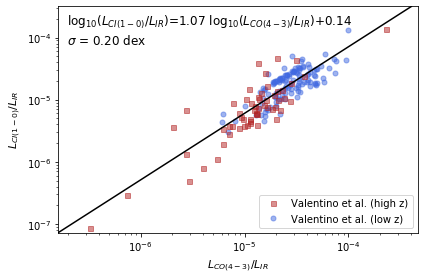

In [5]:
t  = t_hz
sample = t.loc[(t['L_CO43'] > 0) & (t['L_CI10'] > 0)]
x_hz = conv_Lprimto_CO43*sample['L_CO43']/sample['LIR_8_1000um']
y_hz = conv_Lprimto_CI10*sample['L_CI10'] / sample['LIR_8_1000um']
Tdust_hz = sample['Tdust']
plt.plot(x_hz, y_hz, 's', color = 'firebrick', label = 'Valentino et al. (high z)', ms  = 5, zorder = 1, alpha = 0.5)



t = t_lz
sample = t.loc[(t['L\'CO43'] > 0) & (t['L\'CI10'] > 0)]
x_lz = conv_Lprimto_CO43*sample['L\'CO43']/sample['LIR_8_1000um']
y_lz = conv_Lprimto_CI10*sample['L\'CI10'] / sample['LIR_8_1000um']
plt.plot(x_lz, y_lz, 'o', color = 'royalblue', label = 'Valentino et al. (low z)', ms = 5, zorder = 0, alpha = 0.5)
    
plt.xscale('log')
plt.yscale('log')

plt.legend(loc = 4)

x = np.concatenate((np.array(x_lz), np.array(x_hz)))
y = np.concatenate((np.array(y_lz), np.array(y_hz)))

fitpar = np.polyfit(np.log10(x), np.log10(y), 1)

xmin = 0.5*x.min()
xmax = 2.*x.max()

xfit = 10.**np.arange(np.log10(xmin),np.log10(xmax),0.1)
yfit = 10.**(fitpar[1] + fitpar[0] * np.log10(xfit))

logres = np.log10(y) - (fitpar[1] + fitpar[0] * np.log10(x))

fitpar_CI10 = fitpar

sigma_CI10 = np.std(logres)

print(fitpar)
print(np.std(logres))

plt.plot(xfit, yfit, 'k')

plt.xlim([xmin,xmax])
plt.ylim([yfit.min(),yfit.max()])

#.format(fitpar[0], fitpar[1])

plt.text(1.2*xmin, 0.5*yfit.max(),
         r'log$_{10}(L_{CI(1-0)}/L_{IR})$='+'{:0.2f}'.format(fitpar[0])+r' log$_{10}(L_{CO(4-3)}/L_{IR})$+'+'{:0.2f}'.format(fitpar[1]),
         size = 12)
plt.text(1.2*xmin, 0.25*yfit.max(), r'$\sigma$ = {:0.2f} dex'.format(np.std(logres)), size = 12)

plt.xlabel(r'$L_{CO(4-3)}/L_{IR}$', size = 11)

plt.ylabel(r'$L_{CI(1-0)}/L_{IR}$', size = 11)

plt.tight_layout()

plt.savefig('CI10_LIR_vs_CO43_LIR.pdf', dpi  = 150)

[0.62645885 0.16581699]
0.18511398108587673


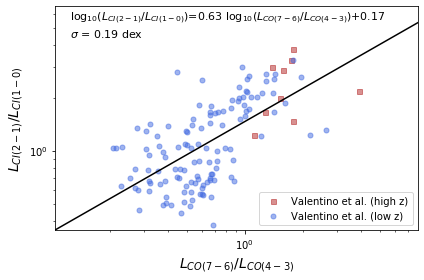

In [16]:
t  = t_hz
sample = t.loc[(t['L_CI21'] > 0) & (t['L_CI10'] > 0) & (t['L_CO43'] > 0) & (t['L_CO76'] > 0)]
x_hz = conv_Lprimto_CO76/conv_Lprimto_CO43*sample['L_CO76']/sample['L_CO43']
y_hz = conv_Lprimto_CI21/conv_Lprimto_CI10*sample['L_CI21'] / sample['L_CI10']
plt.plot(x_hz, y_hz, 's', color = 'firebrick', label = 'Valentino et al. (high z)', ms = 5, alpha = 0.5)



t = t_lz
sample = t.loc[(t['L\'CI21'] > 0) & (t['L\'CI10'] > 0) & (t['L\'CO43'] > 0) & (t['L\'CO76'] > 0)]
x_lz = conv_Lprimto_CO76/conv_Lprimto_CO43*sample['L\'CO76']/sample['L\'CO43']
y_lz = conv_Lprimto_CI21/conv_Lprimto_CI10*sample['L\'CI21'] / sample['L\'CI10']
plt.plot(x_lz, y_lz, 'o', color = 'royalblue', label = 'Valentino et al. (low z)', ms = 5, alpha = 0.5)
    
plt.xscale('log')
plt.yscale('log')

plt.legend(loc = 4)

x = np.concatenate((np.array(x_lz), np.array(x_hz)))
y = np.concatenate((np.array(y_lz), np.array(y_hz)))

fitpar = np.polyfit(np.log10(x), np.log10(y), 1)

fitpar_CI21 = fitpar

xmin = 0.5*x.min()
xmax = 2.*x.max()

xfit = 10.**np.arange(np.log10(xmin),np.log10(xmax)+0.1,0.1)
yfit = 10.**(fitpar[1] + fitpar[0] * np.log10(xfit))

logres = np.log10(y) - (fitpar[1] + fitpar[0] * np.log10(x))

sigma_CI21 = np.std(logres)

print(fitpar)
print(np.std(logres))

plt.plot(xfit, yfit, 'k')

plt.xlim([xmin,xmax])
plt.ylim([yfit.min(),1.2*yfit.max()])

#.format(fitpar[0], fitpar[1])

plt.text(1.2*xmin, 1.*yfit.max(),
         r'log$_{10}(L_{CI(2-1)}/L_{CI(1-0)})$='+'{:0.2f}'.format(fitpar[0])+r' log$_{10}(L_{CO(7-6)}/L_{CO(4-3)})$+'+'{:0.2f}'.format(fitpar[1]),
         size = 11)
plt.text(1.2*xmin, 0.8*yfit.max(), r'$\sigma$ = {:0.2f} dex'.format(np.std(logres)), size = 11)

plt.xlabel(r'$L_{CO(7-6)}/L_{CO(4-3)}$', size = 14)

plt.ylabel(r'$L_{CI(2-1)}/L_{CI(1-0)}$', size = 14)

plt.tight_layout()

plt.savefig('CI21_CI10_vs_CO76_CO43.pdf', dpi  = 150)

In [7]:
import pickle

cat = pickle.load(open('../PYSIDES/OUTPUTS/Unclustered_1deg2.p', 'rb'))

In [8]:
cat.columns

Index(['redshift', 'Mstar', 'qflag', 'SFR', 'issb', 'mu', 'Dlum', 'Umean',
       'LIR', 'S24', 'S70', 'S100', 'S160', 'S250', 'S350', 'S500', 'S1200',
       'S2000', 'LFIR', 'SMIPS24', 'SPACS70', 'SPACS100', 'SPACS160',
       'SSPIRE250', 'SSPIRE350', 'SSPIRE500', 'SNIKA1200', 'SNIKA2000',
       'LprimCO10', 'ICO10', 'ICO21', 'ICO32', 'ICO43', 'ICO54', 'ICO65',
       'ICO76', 'ICO87', 'LCII_Lagache', 'LCII_de_Looze', 'ICII_Lagache',
       'ICII_de_Looze'],
      dtype='object')

In [9]:
nu_CO = 115.27

nu_CI10 = 492.16 #GHz
nu_CI21 = 809.34

nu_CO43 = 4 * nu_CO
nu_CO76 = 7 * nu_CO

In [10]:
LCO43 = 1.04e-3 * cat['ICO43'] * cat['Dlum']**2 * nu_CO43 / (1 + cat['redshift'])
logLCO43_LIR = np.log10(LCO43 / cat['LIR'])
logLCI10_LIR = fitpar_CI10[0] * logLCO43_LIR + fitpar_CI10[1]
LCI10 = 10.**logLCI10_LIR * cat['LIR'] * 10.**(sigma_CI10*np.random.normal(size = len(cat)))

(array([9.8000e+01, 3.1050e+03, 1.0021e+04, 3.1204e+04, 1.7650e+04,
        1.9490e+03, 4.3000e+01, 1.2000e+01, 2.0000e+00, 3.0000e+00]),
 array([-5.67971834, -5.40303854, -5.12635873, -4.84967893, -4.57299912,
        -4.29631932, -4.01963951, -3.7429597 , -3.4662799 , -3.18960009,
        -2.91292029]),
 <a list of 10 Patch objects>)

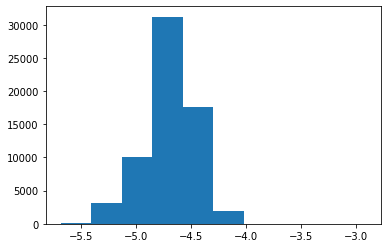

In [11]:
sel = np.where(cat['LIR'] > 1.e11)
plt.hist(logLCO43_LIR[sel[0]])

(array([1.4000e+01, 2.1100e+02, 2.0060e+03, 8.7540e+03, 1.9043e+04,
        2.0183e+04, 1.0749e+04, 2.7540e+03, 3.5200e+02, 2.1000e+01]),
 array([-1.1021551 , -0.92451628, -0.74687745, -0.56923863, -0.39159981,
        -0.21396099, -0.03632216,  0.14131666,  0.31895548,  0.49659431,
         0.67423313]),
 <a list of 10 Patch objects>)

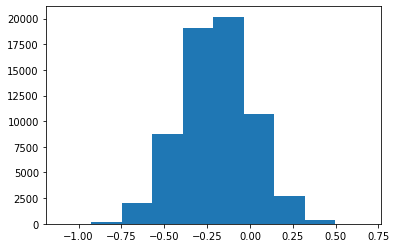

In [12]:
sel = np.where(cat['LIR'] > 1.e11)
plt.hist(np.log10(LCI10[sel[0]]/LCO43[sel[0]]))

In [13]:
LCO43 = 1.04e-3 * cat['ICO43'] * cat['Dlum']**2 * nu_CO43 / (1 + cat['redshift'])
LCO76 = 1.04e-3 * cat['ICO76'] * cat['Dlum']**2 * nu_CO76 / (1 + cat['redshift'])
logLCI21_LCI10 = fitpar_CI21[0] * np.log10(LCO76/LCO43) + fitpar_CI21[1]
LCI21 = 10.**logLCI21_LCI10 * LCI10 * 10.**(sigma_CI21*np.random.normal(size = len(cat)))

(array([   29.,   599.,  5319., 17383., 22091., 12193.,  4540.,  1566.,
          336.,    31.]),
 array([-0.70539514, -0.51559639, -0.32579764, -0.13599888,  0.05379987,
         0.24359862,  0.43339738,  0.62319613,  0.81299488,  1.00279364,
         1.19259239]),
 <a list of 10 Patch objects>)

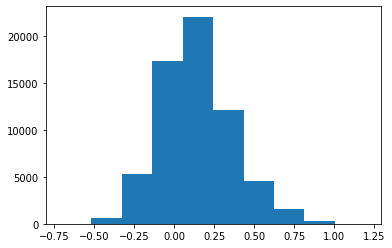

In [14]:
sel = np.where(cat['LIR'] > 1.e11)
plt.hist(np.log10(LCI21[sel[0]]/LCI10[sel[0]]))

(array([1.0000e+01, 2.3300e+02, 1.5450e+03, 6.9630e+03, 1.6737e+04,
        2.1005e+04, 1.3118e+04, 3.8720e+03, 5.7200e+02, 3.2000e+01]),
 array([-1.3206333 , -1.0742384 , -0.8278435 , -0.58144861, -0.33505371,
        -0.08865881,  0.15773609,  0.40413098,  0.65052588,  0.89692078,
         1.14331567]),
 <a list of 10 Patch objects>)

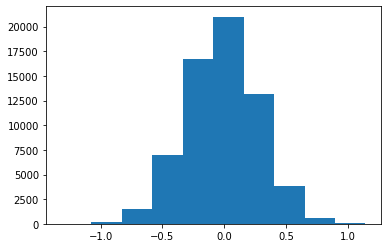

In [15]:
sel = np.where(cat['LIR'] > 1.e11)
plt.hist(np.log10(LCI21[sel[0]]/LCO76[sel[0]]))